In [1]:
import pandas as pd
import numpy as np
import os
import requests
import json
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import datetime

# Google API Key
from config import g_key

In [2]:
# create dataframe
elevation_df = pd.read_csv("output/2019boston_marathon_elevation.csv")
elevation_df.head()

,Unnamed: 0,BibNumber,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,CountryOfResAbbrev,CountryOfResName,OfficialTime,RankOverall,RankOverGender,Address,Lat_x,Lng_x,Coordinates,Elevation
0,0,2,"Cherono, Lawrence",30,M,Eldoret,NaN,NaN,KEN,Kenya,2:07:57,1,1,"Eldoret, Kenya",0.514277,35.269780,"0.5142774999999999, 35.2697802",2070.048340
1,1,6,"Desisa, Lelisa",29,M,Ambo,NaN,NaN,ETH,Ethiopia,2:07:59,2,2,"Ambo, Ethiopia",8.958061,37.932101,"8.9580605, 37.9321008",2376.239258
2,2,7,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,NaN,KEN,Kenya,2:08:07,3,3,"Eldoret, Kenya",0.514277,35.269780,"0.5142774999999999, 35.2697802",2070.048340
3,3,8,"Kandie, Felix",32,M,Iten,NaN,NaN,KEN,Kenya,2:08:54,4,4,"Iten, Kenya",0.673235,35.508314,"0.6732353999999999, 35.5083136",2358.822510
4,4,11,"Kirui, Geoffrey",26,M,Keringet,NaN,NaN,KEN,Kenya,2:08:55,5,5,"Keringet, Kenya",-0.469779,36.000324,"-0.4697789, 36.0003237",2272.979492


In [3]:
# create lists of data
time_data = elevation_df["OfficialTime"]
elevation_data = elevation_df["Elevation"]
time_data

0        2:07:57
1        2:07:59
2        2:08:07
3        2:08:54
4        2:08:55
          ...   
26512    6:16:56
26513    6:18:13
26514    6:21:19
26515    6:22:27
26516    6:35:50
Name: OfficialTime, Length: 26517, dtype: object

In [4]:
# convert strings of time to timsestamps
times = [pd.to_datetime(time, format ="%H:%M:%S", 
                     errors ="coerce") for time in time_data] 
times

# how to change timestamp to formatted string
#.strftime("%H:%M:%S")

[Timestamp('1900-01-01 02:07:57'),
 Timestamp('1900-01-01 02:07:59'),
 Timestamp('1900-01-01 02:08:07'),
 Timestamp('1900-01-01 02:08:54'),
 Timestamp('1900-01-01 02:08:55'),
 Timestamp('1900-01-01 02:08:57'),
 Timestamp('1900-01-01 02:09:25'),
 Timestamp('1900-01-01 02:09:53'),
 Timestamp('1900-01-01 02:11:53'),
 Timestamp('1900-01-01 02:13:46'),
 Timestamp('1900-01-01 02:15:29'),
 Timestamp('1900-01-01 02:15:58'),
 Timestamp('1900-01-01 02:17:37'),
 Timestamp('1900-01-01 02:17:43'),
 Timestamp('1900-01-01 02:19:31'),
 Timestamp('1900-01-01 02:20:51'),
 Timestamp('1900-01-01 02:22:08'),
 Timestamp('1900-01-01 02:25:24'),
 Timestamp('1900-01-01 02:25:30'),
 Timestamp('1900-01-01 02:27:15'),
 Timestamp('1900-01-01 02:27:27'),
 Timestamp('1900-01-01 02:27:53'),
 Timestamp('1900-01-01 02:28:27'),
 Timestamp('1900-01-01 02:28:41'),
 Timestamp('1900-01-01 02:28:50'),
 Timestamp('1900-01-01 02:29:03'),
 Timestamp('1900-01-01 02:29:05'),
 Timestamp('1900-01-01 02:29:33'),
 Timestamp('1900-01-

In [5]:
# testing
max_time = max(times)
min_time = min(times)
print(max_time)
print(min_time)
print(max_time-min_time)
print(times[0])

1900-01-01 06:35:50
1900-01-01 02:07:57
0 days 04:27:53
1900-01-01 02:07:57


In [6]:
# testing
time_string = time_data[0]

date_time = datetime.datetime.strptime(time_string, "%H:%M:%S")

print(date_time)

a_timedelta = date_time - datetime.datetime(1900, 1, 1)
seconds = a_timedelta.total_seconds()

print(seconds)

1900-01-01 02:07:57
7677.0


In [7]:
# create list of finishing times in seconds
seconds = []

for time in time_data:
    date_time = datetime.datetime.strptime(time, "%H:%M:%S")
    a_timedelta = date_time - datetime.datetime(1900, 1, 1)
    num_seconds = a_timedelta.total_seconds()
    seconds.append(num_seconds)

seconds

[7677.0,
 7679.0,
 7687.0,
 7734.0,
 7735.0,
 7737.0,
 7765.0,
 7793.0,
 7913.0,
 8026.0,
 8129.0,
 8158.0,
 8257.0,
 8263.0,
 8371.0,
 8451.0,
 8528.0,
 8724.0,
 8730.0,
 8835.0,
 8847.0,
 8873.0,
 8907.0,
 8921.0,
 8930.0,
 8943.0,
 8945.0,
 8973.0,
 9028.0,
 9054.0,
 9058.0,
 9093.0,
 9097.0,
 9099.0,
 9122.0,
 9131.0,
 9148.0,
 9184.0,
 9211.0,
 9214.0,
 9223.0,
 9239.0,
 9239.0,
 9255.0,
 9263.0,
 9291.0,
 9294.0,
 9294.0,
 9298.0,
 9309.0,
 9313.0,
 9341.0,
 9345.0,
 9351.0,
 9352.0,
 9363.0,
 9376.0,
 9390.0,
 9391.0,
 9400.0,
 9404.0,
 9407.0,
 9419.0,
 9422.0,
 9432.0,
 9447.0,
 9462.0,
 9498.0,
 9503.0,
 9507.0,
 9508.0,
 9509.0,
 9516.0,
 9528.0,
 9530.0,
 9532.0,
 9533.0,
 9538.0,
 9540.0,
 9551.0,
 9566.0,
 9571.0,
 9574.0,
 9582.0,
 9586.0,
 9587.0,
 9588.0,
 9594.0,
 9602.0,
 9612.0,
 9618.0,
 9627.0,
 9629.0,
 9645.0,
 9653.0,
 9656.0,
 9657.0,
 9659.0,
 9663.0,
 9703.0,
 9715.0,
 9719.0,
 9723.0,
 9724.0,
 9726.0,
 9744.0,
 9750.0,
 9751.0,
 9751.0,
 9769.0,
 9775.0,
 

In [16]:
# add seconds to dataframe
elevation_df["Seconds"] = seconds
elevation_df

,Unnamed: 0,BibNumber,SortName,AgeOnRaceDay,Gender,City,StateAbbrev,StateName,CountryOfResAbbrev,CountryOfResName,OfficialTime,RankOverall,RankOverGender,Address,Lat_x,Lng_x,Coordinates,Elevation,Seconds
0,0,2,"Cherono, Lawrence",30,M,Eldoret,NaN,NaN,KEN,Kenya,2:07:57,1,1,"Eldoret, Kenya",0.514277,35.269780,"0.5142774999999999, 35.2697802",2070.048340,7677.0
1,1,6,"Desisa, Lelisa",29,M,Ambo,NaN,NaN,ETH,Ethiopia,2:07:59,2,2,"Ambo, Ethiopia",8.958061,37.932101,"8.9580605, 37.9321008",2376.239258,7679.0
2,2,7,"Kipkemoi, Kenneth",34,M,Eldoret,NaN,NaN,KEN,Kenya,2:08:07,3,3,"Eldoret, Kenya",0.514277,35.269780,"0.5142774999999999, 35.2697802",2070.048340,7687.0
3,3,8,"Kandie, Felix",32,M,Iten,NaN,NaN,KEN,Kenya,2:08:54,4,4,"Iten, Kenya",0.673235,35.508314,"0.6732353999999999, 35.5083136",2358.822510,7734.0
4,4,11,"Kirui, Geoffrey",26,M,Keringet,NaN,NaN,KEN,Kenya,2:08:55,5,5,"Keringet, Kenya",-0.469779,36.000324,"-0.4697789, 36.0003237",2272.979492,7735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26512,26512,30798,"Shubert, Mackenzie",28,F,Malden,MA,Massachusetts,USA,United States of America,6:16:56,26636,11975,"Malden, MA",42.425096,-71.066163,"42.4250964, -71.066163",3.172937,22616.0
26513,26513,25235,"Mcsweeney, Nikki",33,F,Natick,MA,Massachusetts,USA,United States of America,6:18:13,26637,11976,"Natick, MA",42.277528,-71.346809,"42.2775281, -71.3468091",51.877419,22693.0
26514,26514,25616,"Genest, Debbie",44,F,Harrisville,RI,Rhode Island,USA,United States of America,6:21:19,26640,11977,"Harrisville, RI",41.965654,-71.674511,"41.96565390000001, -71.6745112",97.678200,22879.0
26515,26515,23316,"Lewandowski, Denise",50,F,Boiling Springs,PA,Pennsylvania,USA,United States of America,6:22:27,26641,11978,"Boiling Springs, PA",40.149812,-77.128313,"40.14981239999999, -77.1283133",147.602921,22947.0


In [17]:
# create time (in seconds) data to use for plot
second_data = elevation_df["Seconds"]
second_data

0         7677.0
1         7679.0
2         7687.0
3         7734.0
4         7735.0
          ...   
26512    22616.0
26513    22693.0
26514    22879.0
26515    22947.0
26516    23750.0
Name: Seconds, Length: 26517, dtype: float64

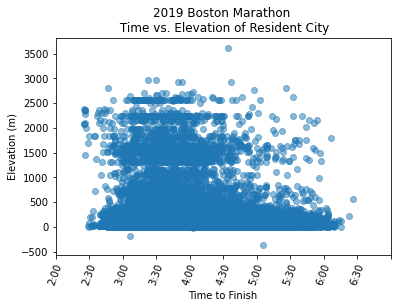

In [20]:
# create scatter plot **this one uses seconds
plt.scatter(second_data, elevation_data, marker="o", alpha=0.5)
plt.title(f"2019 Boston Marathon \n Time vs. Elevation of Resident City")
plt.xlabel("Time to Finish")
plt.ylabel("Elevation (m)")
locs, labels = plt.xticks()
plt.xticks(locs, ["2:00","2:30","3:00","3:30","4:00","4:30","5:00","5:30","6:00","6:30"], rotation=70)
#plt.savefig("output/plot1.png")
plt.show()

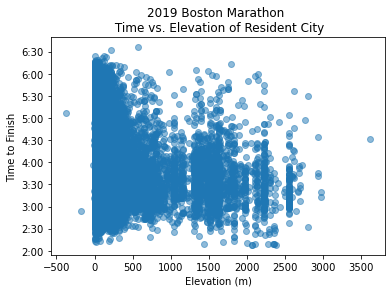

In [65]:
# create scatter plot **this one uses datetime
plt.scatter(elevation_data, times, marker="o", alpha=0.5)
plt.title(f"2019 Boston Marathon \n Time vs. Elevation of Resident City")
plt.xlabel("Elevation (m)")
plt.ylabel("Time to Finish")
locs, labels = plt.yticks()
plt.yticks(locs, ["2:00","2:30","3:00","3:30","4:00","4:30","5:00","5:30","6:00","6:30"])
#plt.savefig("output/plot1.png")
plt.show()

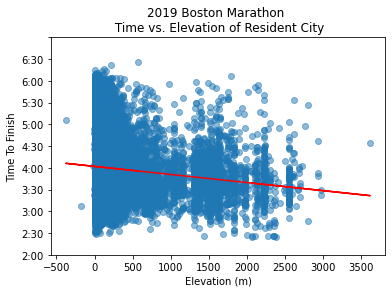

Linear Regression Model: y = -0.74x + 14133.54
The correlation coefficient is -0.12


In [64]:
# create plot with linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(elevation_data, second_data)
regress_values = elevation_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(elevation_data, second_data, marker="o", alpha=0.5)
plt.plot(elevation_data, regress_values, "r-")
plt.title(f"2019 Boston Marathon \n Time vs. Elevation of Resident City")
plt.xlabel("Elevation (m)")
plt.ylabel("Time To Finish")
locs, labels = plt.yticks()
plt.yticks(locs, ["2:00","2:30","3:00","3:30","4:00","4:30","5:00","5:30","6:00","6:30"])
#plt.savefig("output/plot5.png")
plt.show()

correlation = st.pearsonr(elevation_data, second_data)
print(f"Linear Regression Model: {line_eq}")
print(f"The correlation coefficient is {round(correlation[0],2)}")

In [25]:
mean_numpy = str(datetime.timedelta(seconds=(np.mean(second_data))))
print(f"The mean finishing time is {mean_numpy}")

median_numpy = str(datetime.timedelta(seconds=(np.median(second_data))))
print(f"The median finishing time is {median_numpy}")

mode_scipy = st.mode(second_data)
print(f"The mode finishing time is {mode_scipy}")

The mean finishing time is 3:52:47.284346
The median finishing time is 3:45:26
The mode finishing time is ModeResult(mode=array([13759.]), count=array([13]))


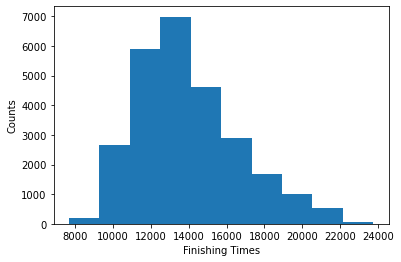

NormaltestResult(statistic=8.28898386415339, pvalue=0.015851487538126204)


In [27]:
# Characterize the data set using matplotlib and stats.normaltest
plt.hist(second_data)
plt.xlabel('Finishing Times')
plt.ylabel('Counts')
plt.show()
print(st.normaltest(second_data.sample(50)))

In [35]:
# divide data frame into high altitudes & normal altitudes
high_altitude_df = elevation_df.loc[elevation_df["Elevation"] >= 1500]
normal_altitude_df = elevation_df.loc[elevation_df["Elevation"] < 1500]
print(len(high_altitude_df))
print(len(normal_altitude_df))

1054
25463


In [51]:
# create data for times
high_sec_data = high_altitude_df["Seconds"]
norm_sec_data = normal_altitude_df["Seconds"]
all_sec_data = elevation_df["Seconds"]

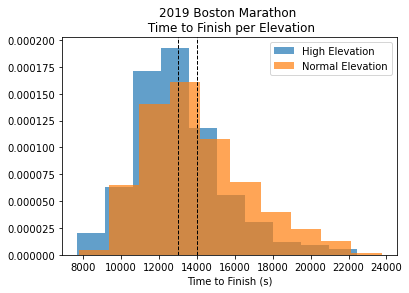

In [70]:
# create plot for high altitude times and normal altitude times
plt.hist(high_sec_data, 10, density=True, alpha=0.7, label="High Elevation")
plt.hist(norm_sec_data, 10, density=True, alpha=0.7, label="Normal Elevation")
plt.axvline(high_sec_data.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(norm_sec_data.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f"2019 Boston Marathon \n Time to Finish per Elevation")
plt.xlabel("Time to Finish (s)")
plt.legend() 

In [38]:
st.ttest_ind(high_sec_data, norm_sec_data, equal_var=False)

Ttest_indResult(statistic=-13.330323147836811, pvalue=7.710634758602041e-38)

In [44]:
# divide data frame into altitudes higher & lower than Boston
boston_low_elevation_df = elevation_df.loc[elevation_df["Elevation"] <= 43]
boston_high_elevation_df = elevation_df.loc[elevation_df["Elevation"] > 43]
print(len(boston_low_elevation_df))
print(len(boston_high_elevation_df))

10904
15613


In [46]:
# create data for times
b_low_sec_data = boston_low_elevation_df["Seconds"]
b_high_sec_data = boston_high_elevation_df["Seconds"]

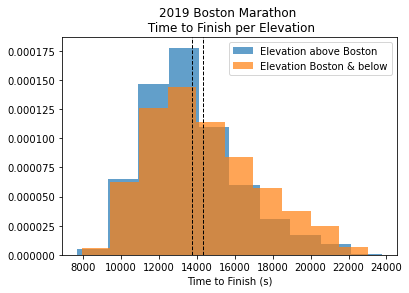

In [69]:
# create plot for times for elevations below Boston and elevations above Boston
plt.hist(b_high_sec_data, 10, density=True, alpha=0.7, label="Elevation above Boston")
plt.hist(b_low_sec_data, 10, density=True, alpha=0.7, label="Elevation Boston & below")
plt.axvline(b_high_sec_data.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(b_low_sec_data.mean(), color='k', linestyle='dashed', linewidth=1)
plt.title(f"2019 Boston Marathon \n Time to Finish per Elevation")
plt.xlabel("Time to Finish (s)")
plt.legend() 

In [49]:
st.ttest_ind(b_high_sec_data, b_low_sec_data, equal_var=False)

Ttest_indResult(statistic=-18.361153210514047, pvalue=1.0119927170206424e-74)

In [ ]:
#make boxplots?